## Title :
Dropout

## Description :

The goal of this exercise is to understand and use **dropouts for neural network regularization.

This method avoids overfitting by briefly switching off certain weights during training.

NOTE: This graph is only a sample.

<img src="../fig/fig4.png" style="width: 500px;">

## Instructions:

- Use the helper function `unregularized_model` to:
    - Generate the predictor and response data using the helper code given.
    - Build a simple neural network with 5 hidden layers with 100 neurons each and display the trace plot. This network has no regularization.
- For the same model architecture implement dropout by adding appropriate dropout layers.
- Compile the model with MSE as the loss. Fit the model on the training data.
- Use the helper code to visualise the MSE of the train and test data with respect to the epochs.
- Predict on the entire data. 
- Use the helper code to plot the predictions along with the generated data.
- This plot will consist of the predictions of both the neural networks. The graph will look similar to the one given above.

## Hints: 

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Sequential" target="_blank">tf.keras.sequential()</a>
A sequential model is for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers" target="_blank">tf.keras.optimizers()</a>
An optimizer is one of the two arguments required for compiling a Keras model

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense" target="_blank">model.add()</a>
Adds layers to the model.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile" target="_blank">model.compile()</a>
Compiles the layers defined into a neural network

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.fit()</a>
Fits the data to the neural network

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.predict()</a>
Used to predict the values given the model

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History" target="_blank">history()</a>
The history object is returned from calls to the fit() function used to train the model. Metrics are stored in a dictionary in the history member of the object returned.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout" target="_blank">tf.keras.layers.Dropout()</a>
Applies Dropout to the input data of the layer.

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
np.random.seed(0)
tf.random.set_seed(0)
from helper2 import unregularized_model
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline

2023-07-27 21:27:00.426305: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 21:27:00.452284: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-27 21:27:00.452983: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-27 21:27:01.026326: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Implement an unregularized NN 

2023-07-27 21:27:05.702162: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-07-27 21:27:05.702194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: ting-Dell-G15-5515
2023-07-27 21:27:05.702200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: ting-Dell-G15-5515
2023-07-27 21:27:05.702387: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-07-27 21:27:05.702401: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-07-27 21:27:05.702405: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


1/1 [==============================] - 0s 14ms/step


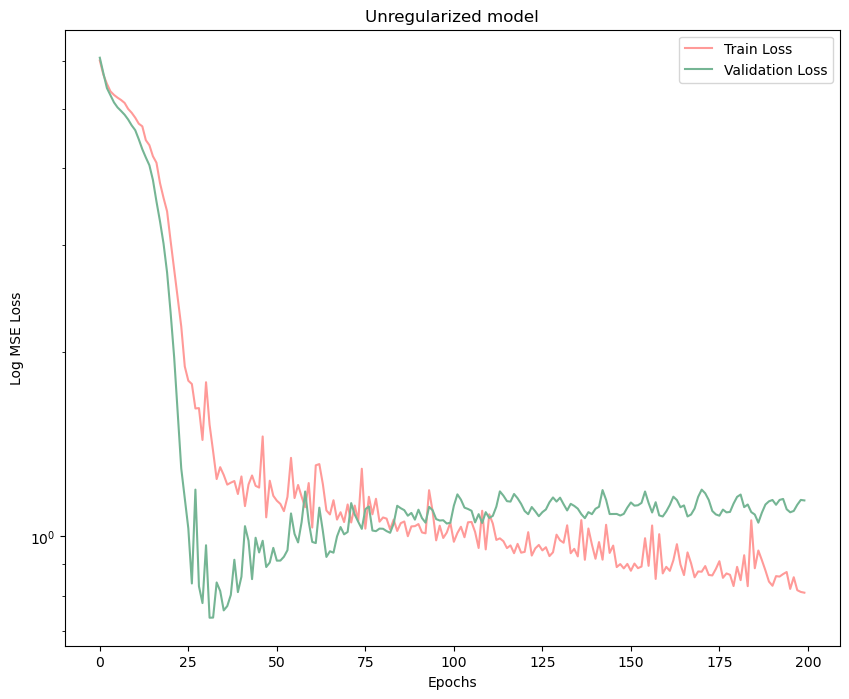

In [2]:
# Call the helper function unregularized_model() to get the 
# unregularized model along with the data
x_b, x_train, x_test, y_train, y_test, y_pred, mse = unregularized_model()

In [3]:
# Printing the MSE of the unregularized model
print("MSE of the unregularized model is", mse)

MSE of the unregularized model is 1.144532689062845


## Implement the NN with dropouts
For dropout we build the same network with "Dropout" layers after each activation.

In [4]:
model_2 = models.Sequential(name='Dropout_regularized')

# Hidden 5 layer with 100 neurons each (or nodes)
# Add a dropout layer after each hidden layer with some dropout percentage
model_2.add(layers.Dense(100, activation='relu', input_shape=(1,)))
model_2.add(layers.Dropout(rate = 0.2))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(rate =0.5))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(rate =0.5))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(rate =0.5))

model_2.add(layers.Dense(100, activation='relu'))
model_2.add(layers.Dropout(rate =0.5))

# Output layer with one neuron 
model_2.add(layers.Dense(1,  activation='linear'))


In [5]:
# Compile the model with MSE as loss and Adam optimizer with learning rate as 0.001
model_2.compile(loss = "mean_squared_error", optimizer = optimizers.Adam(learning_rate=0.001))

# Save the history about the model after fitting on the train data
# Use 0.2 validation split  with 1500 epochs and batch size of 10
history_2 = model_2.fit(x_train, y_train, validation_split = 0.2, epochs=1500, batch_size=10)


Epoch 1/1500
2/2 [==============================] - 1s 92ms/step - loss: 7.2750 - val_loss: 2.9989
Epoch 2/1500
2/2 [==============================] - 0s 17ms/step - loss: 7.2501 - val_loss: 3.0472
Epoch 3/1500
2/2 [==============================] - 0s 20ms/step - loss: 7.2497 - val_loss: 3.0892
Epoch 4/1500
2/2 [==============================] - 0s 17ms/step - loss: 7.0385 - val_loss: 3.1425
Epoch 5/1500
2/2 [==============================] - 0s 18ms/step - loss: 6.8345 - val_loss: 3.1915
Epoch 6/1500
2/2 [==============================] - 0s 18ms/step - loss: 7.0235 - val_loss: 3.2256
Epoch 7/1500
2/2 [==============================] - 0s 19ms/step - loss: 7.2211 - val_loss: 3.2638
Epoch 8/1500
2/2 [==============================] - 0s 18ms/step - loss: 6.8522 - val_loss: 3.2969
Epoch 9/1500
2/2 [==============================] - 0s 20ms/step - loss: 6.0065 - val_loss: 3.3362
Epoch 10/1500
2/2 [==============================] - 0s 18ms/step - loss: 6.6234 - val_loss: 3.3861
Epoch 11/

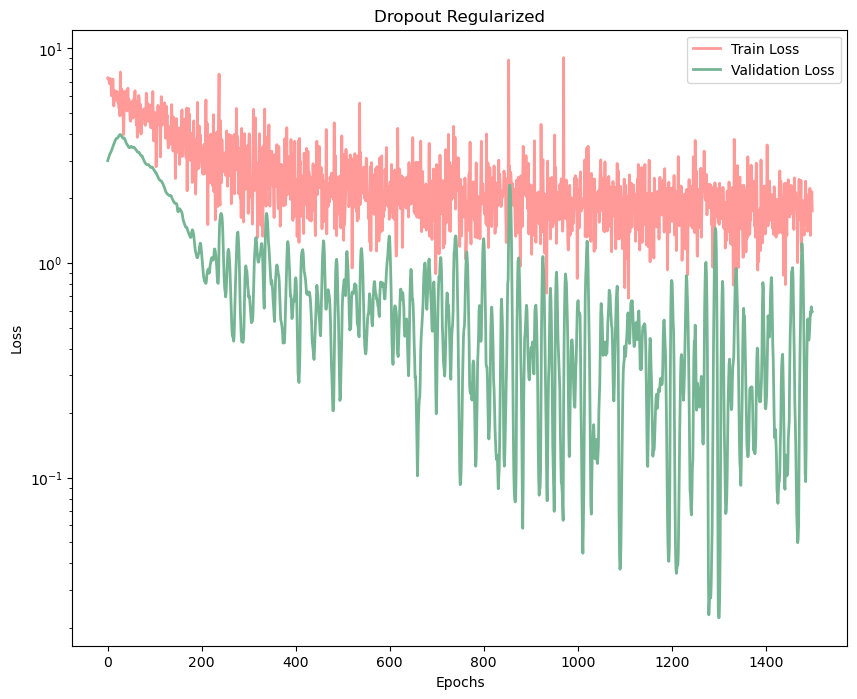

In [6]:
# Helper code to plot the data

# Plot the MSE of the model
plt.rcParams["figure.figsize"] = (10,8)
plt.title("Dropout Regularized")
plt.semilogy(history_2.history['loss'], label='Train Loss', color='#FF9A98', linewidth=2)
plt.semilogy(history_2.history['val_loss'],  label='Validation Loss', color='#75B594', linewidth=2)
plt.legend()

# Set the axes labels
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### ⏸ In the trace plot above, why is the validation error lower than the training error?


#### A. The dropout percentage is high and hence the model is underfit during validation.
#### B. During the validation phase, the validation loss is multiplied by the percentage of dropout, hence the loss is always lower than the training loss.
#### C. The dropout percentage is low and hence the model overfits on the validation data.
#### D. The validation takes place in the evaluation mode of dropout where the weights are already learned.

In [ ]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below 
# (eg. if you choose option A, put 'A')
answer1 = 'D'

In [7]:
### edTest(test_mse) ###
# Predict your model on x_b (used exclusively for plotting)
y_hat_dropout = model_2.predict(x_b)

# Predict your model on the test data 
y_dropout_test = model_2.predict(x_test)

# Compute the MSE on the test data
mse_dropout = mean_squared_error(y_test, y_dropout_test)

1/1 [==============================] - 0s 14ms/step


In [8]:
# Print the MSE of the dropout regularized model
print("MSE of the dropout regularized model is", mse_dropout)

MSE of the dropout regularized model is 1.4003118404064399


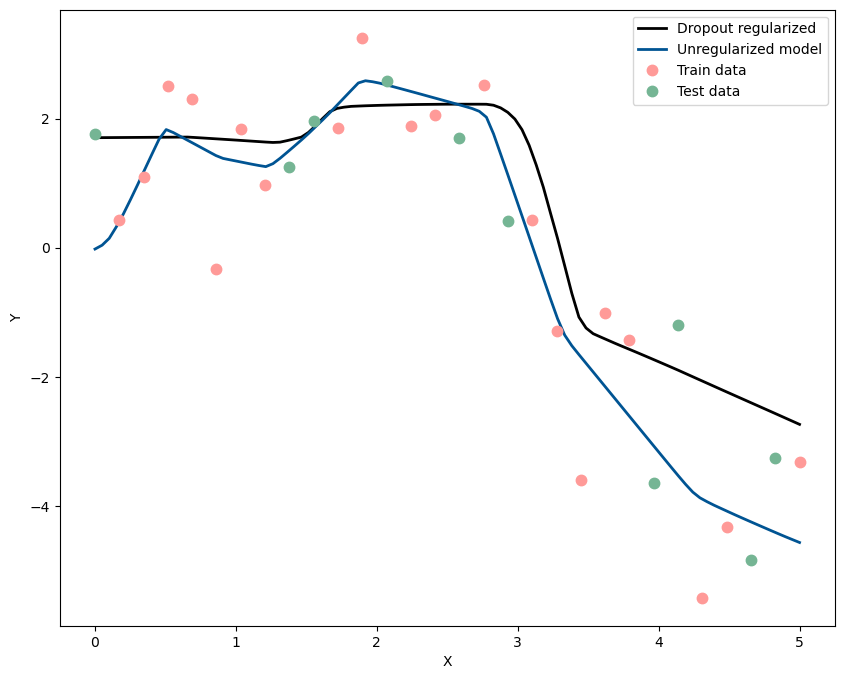

In [9]:
# Use the helper code to plot the predicted data

# Plotting the predicted data using the L2 regularized model
plt.rcParams["figure.figsize"] = (10,8)
plt.plot(x_b, y_hat_dropout, label='Dropout regularized', color='black', linewidth=2)

# Plotting the predicted data using the unregularized model
plt.plot(x_b, y_pred, label = 'Unregularized model', color='#005493', linewidth=2)

# Plotting the training data
plt.plot(x_train, y_train, '.', label='Train data', markersize=15, color='#FF9A98')

# Plotting the testing data
plt.plot(x_test,y_test, '.', label='Test data', markersize=15, color='#75B594')

# Set the axes labels
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### ⏸ **After marking the exercise, change dropout percentage to 0.8 first and 0.2 next. Do you notice any change? Which value regularizes the neural network more?**

In [ ]:
### edTest(test_chow2) ###
# Type your answer within in the quotes given

answer2 = '___'